# Bifurcation Analysis with Julia



References:
* Nonlinear Dynamics and Chaos (2nd edition) *by Steven Strogatz*

### Import all the important packages

In [1]:
using Plots, Bifurcations
using Parameters: @unpack
using DiffEqBase: ODEProblem, init, solve!
using Bifurcations: BifurcationProblem
using Setfield: @lens
using ParameterizedFunctions: @ode_def

### Example 4.3.1

In [18]:
param = (
    beta = 1.0
)

# define model
function f(u, p, t)
    @unpack beta = p
    x = u[1]
    dx = -x + beta*tanh(x)
    return dx
end

f (generic function with 1 method)

In [19]:
# create ODE problem
u0 = 0.0
tspan = (0.0, 10.0)
ode = ODEProblem(f, u0, tspan, param)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 0.0

In [20]:
# create bifurcation problem
param_axis = @lens _.beta
prob = BifurcationProblem(ode, param_axis, (0.0, 2.0))

ErrorException: type Float64 has no field beta

### Example 4.3.2

In [6]:
# define model
f = @ode_def subPF begin
    dx = r*x - x^3
end r 

# create ODE problem
u0 = 0.0
tspan = (0.0, 10.0)
ode = ODEProblem(f, u0, tspan, 0.0)

# create bifurcation problem
param_axis = @lens _.r
prob = BifurcationProblem(ode, param_axis, (-5.0, 5.0))




ErrorException: type Float64 has no field r

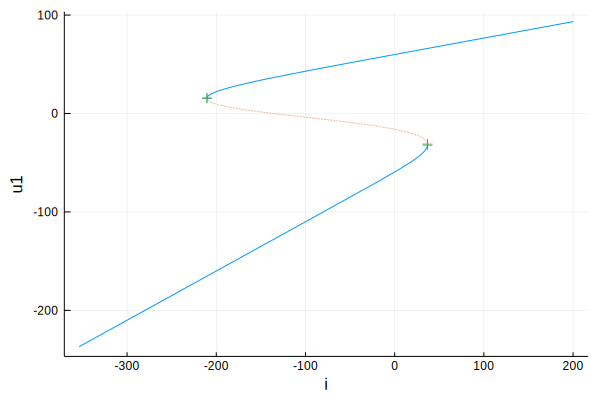

In [16]:
using StaticArrays: SVector

calcium_param = (
    vl = -60,
    vca = 120,
    i = -220.0,
    gl = 2,
    gca = 4,
    c = 20,
    v1 = -1.2,
    v2 = 18,
)


function f(u, p, t)
    @unpack vl, vca, i, gl, gca, c, v2, v1 = p
    v = u[1]
    w = u[2]
    dv = (i + gl * (vl - v) - gca * 0.5 * (1 + tanh((v-v1)/v2)) * (v-vca)) / c
    dw = v-w
    return SVector(dv, dw)
end

u0 = SVector(-170.0, -170.0)
tspan = (0.0, 30.0)  # ignored by Bifurcations.jl
ode = ODEProblem(f, u0, tspan, calcium_param)

param_axis = @lens _.i
prob = BifurcationProblem(ode, param_axis, (-300.0, 100.0))

solver = init(prob)
solve!(solver)
sol = solver.sol

plt = plot(sol)